In [1]:
import os
import sys
import numpy as np

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split

In [4]:
import matplotlib.pyplot as plt
from init_model_lstm import DeconvolutionModel

In [5]:
device = (
        "cuda"
        if torch.cuda.is_available()
        else "mps"
        if torch.backends.mps.is_available()
        else "cpu"
    )
print(f"Using {device} device")

n = 10000
known_freqs_file = f'known_freqs_{n}.npy'
snv_freqs_file = f'snv_freqs_{n}.npy'

snv_freqs=np.load(snv_freqs_file)
known_freqs=np.load(known_freqs_file)

Using cuda device


In [6]:
snv_freqs=torch.from_numpy(snv_freqs).to(device)
# snv_freqs=add_gaussian_noise(snv_freqs, device)
known_freqs=torch.from_numpy(known_freqs).to(device)

In [7]:
batch_size=snv_freqs.shape[0]
seq_len=1
input_size = snv_freqs.shape[1]
output_size = known_freqs.shape[1]

snv_freqs=snv_freqs.view(batch_size, seq_len, input_size)

In [8]:
dataset = TensorDataset(snv_freqs, known_freqs)

total_size = len(dataset)
test_size = total_size // 10  # 10% for test
validation_size = total_size // 10  # 10% for validation
train_size = total_size - test_size - validation_size  # 80% train

# Split the dataset
train_dataset, validation_dataset, test_dataset = random_split(
        dataset, [train_size, validation_size, test_size]
    )

# verify sizes
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(validation_dataset)}")
print(f"Test set size: {len(test_dataset)}")

Training set size: 8000
Validation set size: 1000
Test set size: 1000


In [11]:
batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [12]:
hidden_size=4096
num_layers=2
model = DeconvolutionModel(input_size, hidden_size, output_size, num_layers, device)

model.fit(train_loader, validation_loader, epochs=20000)

# Evaluate the model
model.evaluate(validation_loader)

# Predict using the model
predictions, actuals = model.predict(test_loader)

Using cuda device
Epoch 1, Train loss: 0.0070288113, Validation loss: 0.0066625749, LR: 1e-06
Epoch 2, Train loss: 0.0065643152, Validation loss: 0.0064615426, LR: 1e-06
Epoch 3, Train loss: 0.0064042457, Validation loss: 0.0063345152, LR: 1e-06
Epoch 4, Train loss: 0.0062974069, Validation loss: 0.0062483113, LR: 1e-06
Epoch 5, Train loss: 0.0062149120, Validation loss: 0.0061771909, LR: 1e-06
Epoch 6, Train loss: 0.0061525336, Validation loss: 0.0061265203, LR: 1e-06
Epoch 7, Train loss: 0.0061015863, Validation loss: 0.0060918311, LR: 1e-06
Epoch 8, Train loss: 0.0060694766, Validation loss: 0.0060638791, LR: 1e-06
Epoch 9, Train loss: 0.0060415100, Validation loss: 0.0060390843, LR: 1e-06
Epoch 10, Train loss: 0.0060225535, Validation loss: 0.0060167019, LR: 1e-06
Epoch 11, Train loss: 0.0059915659, Validation loss: 0.0059959765, LR: 1e-06
Epoch 12, Train loss: 0.0059697991, Validation loss: 0.0059780788, LR: 1e-06
Epoch 13, Train loss: 0.0059567872, Validation loss: 0.0059654673, 

KeyboardInterrupt: 

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions.flatten(), actuals.flatten(), alpha=0.5)
plt.xlabel('Predicted Frequencies')
plt.ylabel('Actual Frequencies')

min_val = min(actuals.flatten().min(), predictions.flatten().min())
max_val = max(actuals.flatten().max(), predictions.flatten().max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.title(f'Predicted vs Actual Frequencies of Baseline LSTM Model RMSE Loss \n 2*4096 Sparsemax Batch Size 128 1e-06 ReduceOnPlateau')
plt.show()

NameError: name 'predictions' is not defined

<Figure size 1000x600 with 0 Axes>

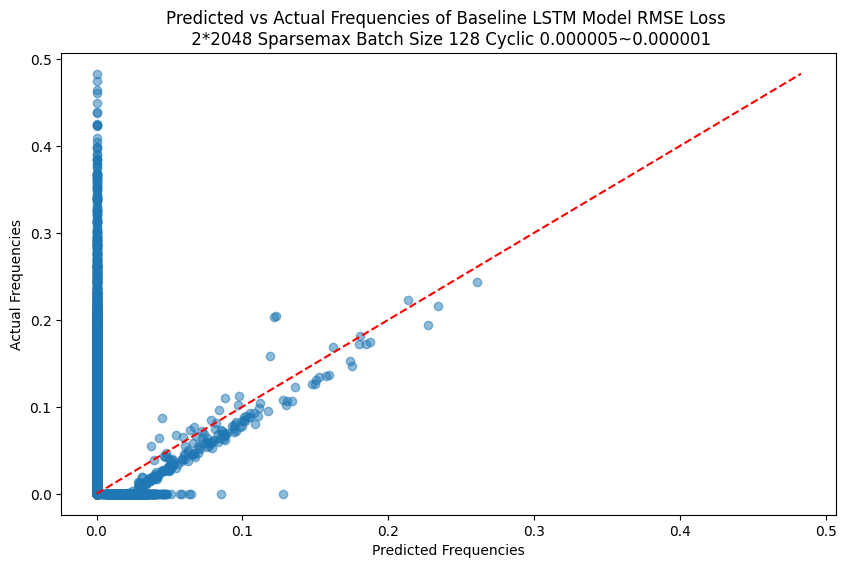

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions.flatten(), actuals.flatten(), alpha=0.5)
plt.xlabel('Predicted Frequencies')
plt.ylabel('Actual Frequencies')

min_val = min(actuals.flatten().min(), predictions.flatten().min())
max_val = max(actuals.flatten().max(), predictions.flatten().max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.title(f'Predicted vs Actual Frequencies of Baseline LSTM Model RMSE Loss \n 2*2048 Sparsemax Batch Size 128 Cyclic 0.000005~0.000001')
plt.show()

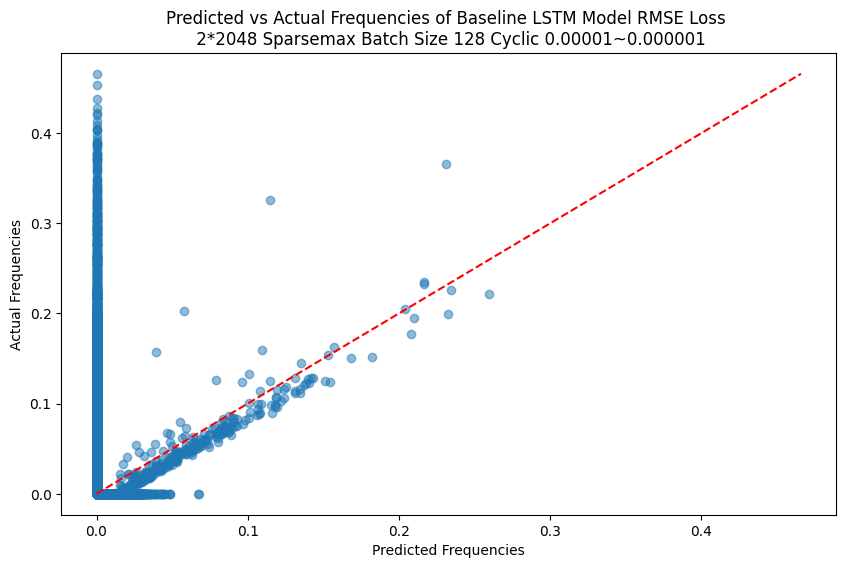

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions.flatten(), actuals.flatten(), alpha=0.5)
plt.xlabel('Predicted Frequencies')
plt.ylabel('Actual Frequencies')

min_val = min(actuals.flatten().min(), predictions.flatten().min())
max_val = max(actuals.flatten().max(), predictions.flatten().max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.title(f'Predicted vs Actual Frequencies of Baseline LSTM Model RMSE Loss \n 2*2048 Sparsemax Batch Size 128 Cyclic 0.00001~0.000001')
plt.show()

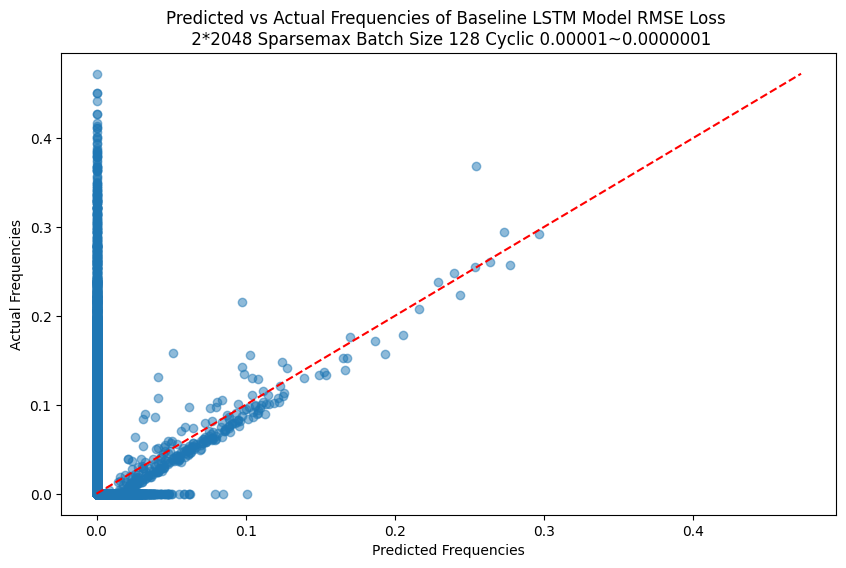

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions.flatten(), actuals.flatten(), alpha=0.5)
plt.xlabel('Predicted Frequencies')
plt.ylabel('Actual Frequencies')

min_val = min(actuals.flatten().min(), predictions.flatten().min())
max_val = max(actuals.flatten().max(), predictions.flatten().max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.title(f'Predicted vs Actual Frequencies of Baseline LSTM Model RMSE Loss \n 2*2048 Sparsemax Batch Size 128 Cyclic 0.00001~0.0000001')
plt.show()

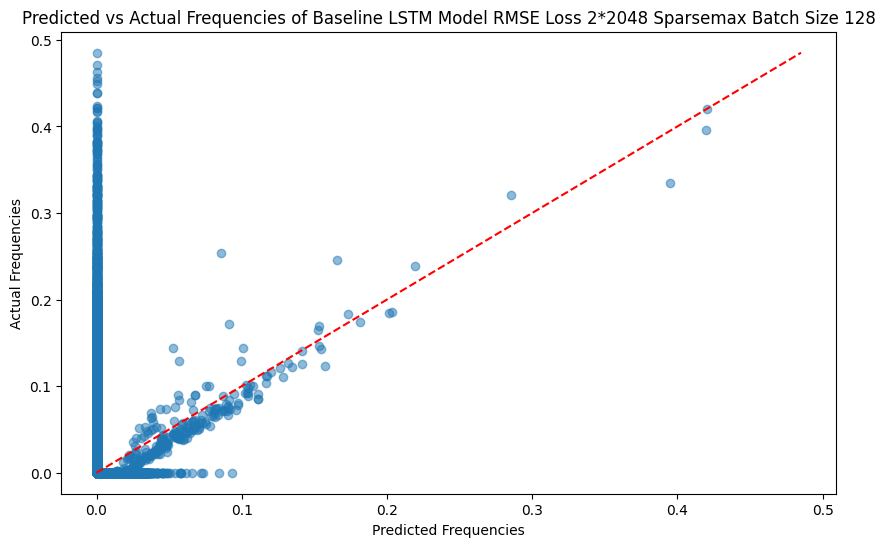

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions.flatten(), actuals.flatten(), alpha=0.5)
plt.xlabel('Predicted Frequencies')
plt.ylabel('Actual Frequencies')

min_val = min(actuals.flatten().min(), predictions.flatten().min())
max_val = max(actuals.flatten().max(), predictions.flatten().max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.title(f'Predicted vs Actual Frequencies of Baseline LSTM Model RMSE Loss 2*2048 Sparsemax Batch Size 128')
plt.show()

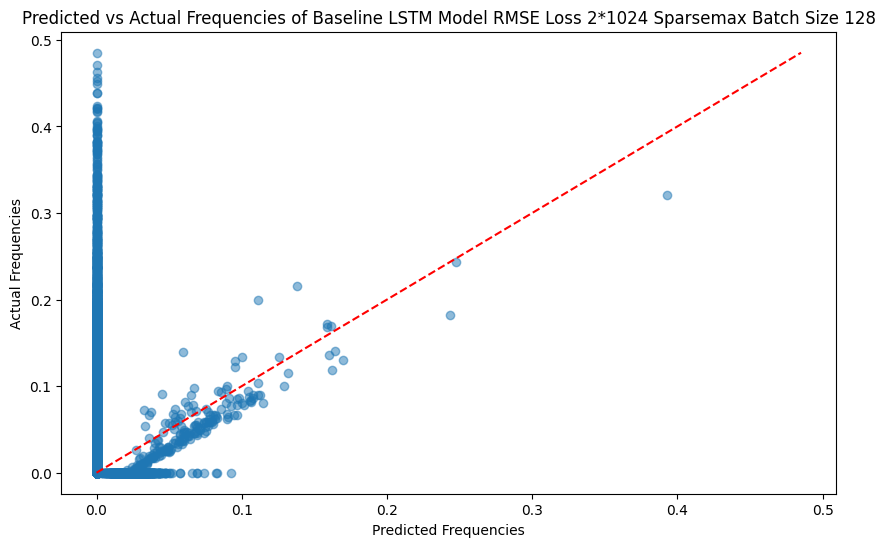

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions.flatten(), actuals.flatten(), alpha=0.5)
plt.xlabel('Predicted Frequencies')
plt.ylabel('Actual Frequencies')

min_val = min(actuals.flatten().min(), predictions.flatten().min())
max_val = max(actuals.flatten().max(), predictions.flatten().max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.title(f'Predicted vs Actual Frequencies of Baseline LSTM Model RMSE Loss 2*1024 Sparsemax Batch Size 128')
plt.show()

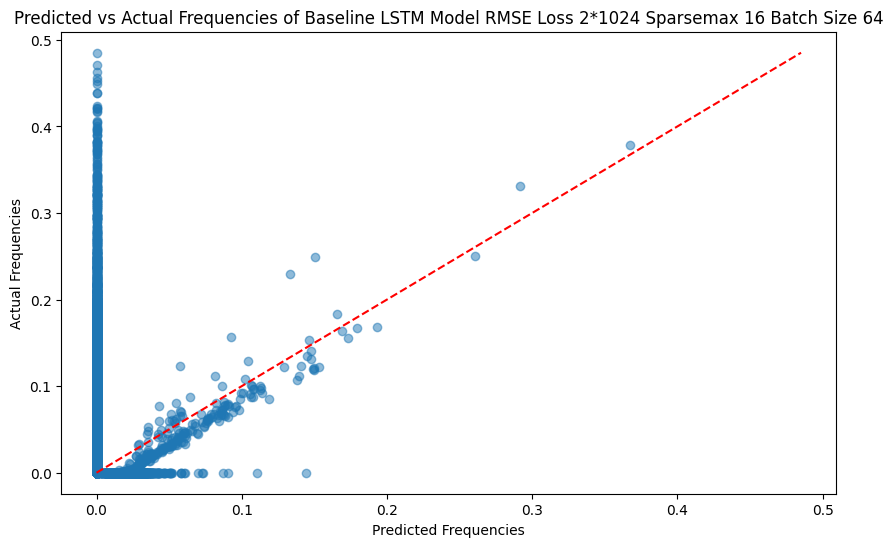

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions.flatten(), actuals.flatten(), alpha=0.5)
plt.xlabel('Predicted Frequencies')
plt.ylabel('Actual Frequencies')

min_val = min(actuals.flatten().min(), predictions.flatten().min())
max_val = max(actuals.flatten().max(), predictions.flatten().max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.title(f'Predicted vs Actual Frequencies of Baseline LSTM Model RMSE Loss 2*1024 Sparsemax 16 Batch Size 64')
plt.show()

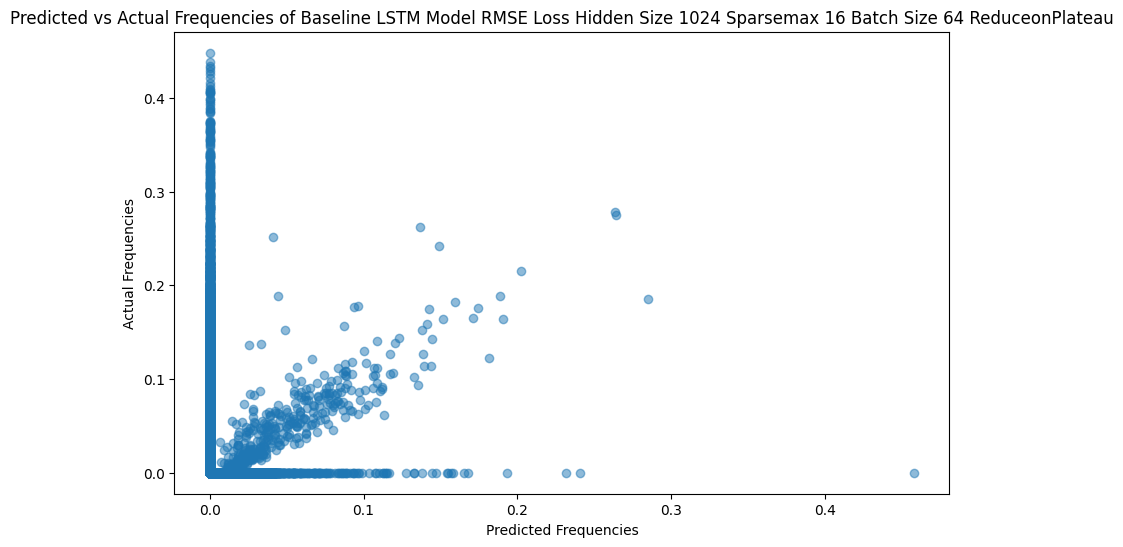

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions.flatten(), actuals.flatten(), alpha=0.5)
plt.xlabel('Predicted Frequencies')
plt.ylabel('Actual Frequencies')
plt.title(f'Predicted vs Actual Frequencies of Baseline LSTM Model RMSE Loss Hidden Size 1024 Sparsemax 16 Batch Size 64 ReduceonPlateau')
plt.show()